# Task 2 — CIFAR-10 Image Classification
Notebook: data loading, model building, training, evaluation, plots, and saving model.

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# Load CIFAR-10 dataset (built into Keras)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize to [0,1] range for stable training
x_train, x_test = x_train.astype("float32") / 255.0, x_test.astype("float32") / 255.0

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)


C:\Users\zaid khan\AppData\Local\Temp\ipykernel_4364\276316306.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])


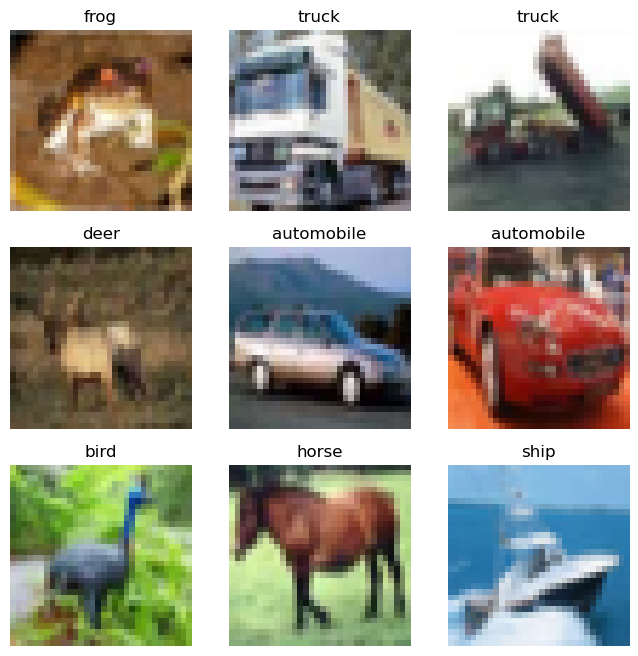

In [4]:
# show 9 sample images with labels
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[int(y_train[i])])
    plt.axis('off')
plt.show()

In [5]:
def build_simple_cnn(input_shape=(32,32,3), num_classes=10):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model = build_simple_cnn()
model.summary()

c:\Users\zaid khan\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(
    optimizer='adam',                       # adaptive optimizer; good default
    loss='sparse_categorical_crossentropy',# labels are integer encoded
    metrics=['accuracy']                   # monitor accuracy
)

In [7]:
EPOCHS = 10
BATCH_SIZE = 64

history = model.fit(
    x_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.1,   # reserve 10% of training data for validation
    verbose=2
)

Epoch 1/10
704/704 - 16s - 22ms/step - accuracy: 0.4373 - loss: 1.5442 - val_accuracy: 0.5194 - val_loss: 1.3250
Epoch 2/10
704/704 - 14s - 19ms/step - accuracy: 0.5852 - loss: 1.1688 - val_accuracy: 0.6198 - val_loss: 1.0793
Epoch 3/10
704/704 - 14s - 20ms/step - accuracy: 0.6468 - loss: 1.0080 - val_accuracy: 0.6572 - val_loss: 0.9828
Epoch 4/10
704/704 - 14s - 19ms/step - accuracy: 0.6874 - loss: 0.8936 - val_accuracy: 0.6844 - val_loss: 0.9097
Epoch 5/10
704/704 - 14s - 19ms/step - accuracy: 0.7190 - loss: 0.8061 - val_accuracy: 0.6960 - val_loss: 0.8913
Epoch 6/10
704/704 - 14s - 19ms/step - accuracy: 0.7448 - loss: 0.7318 - val_accuracy: 0.6996 - val_loss: 0.8595
Epoch 7/10
704/704 - 17s - 24ms/step - accuracy: 0.7674 - loss: 0.6647 - val_accuracy: 0.7152 - val_loss: 0.8514
Epoch 8/10
704/704 - 14s - 20ms/step - accuracy: 0.7860 - loss: 0.6064 - val_accuracy: 0.7240 - val_loss: 0.8334
Epoch 9/10
704/704 - 14s - 20ms/step - accuracy: 0.8054 - loss: 0.5477 - val_accuracy: 0.7218 - 

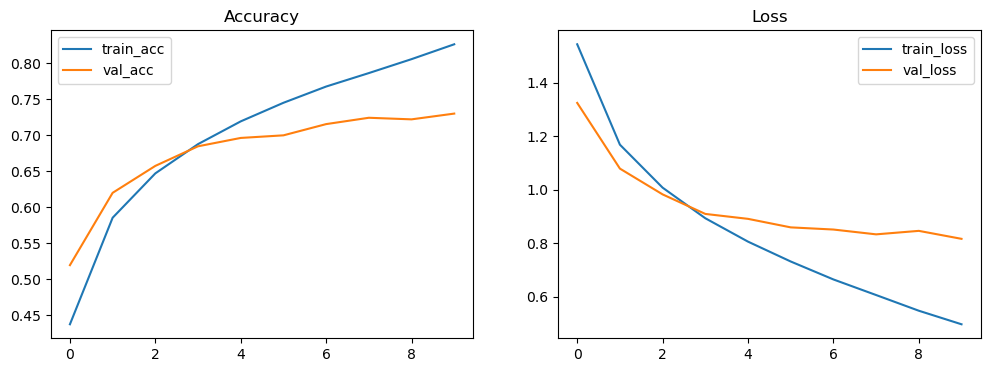

In [8]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss')
plt.legend()

plt.show()

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc*100:.2f}%")

313/313 - 2s - 5ms/step - accuracy: 0.7123 - loss: 0.8830
Test accuracy: 71.23%


In [10]:
model_path = "cifar10_cnn_model.h5"
model.save(model_path)
print("✅ Model saved successfully at:", model_path)

✅ Model saved successfully at: cifar10_cnn_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step


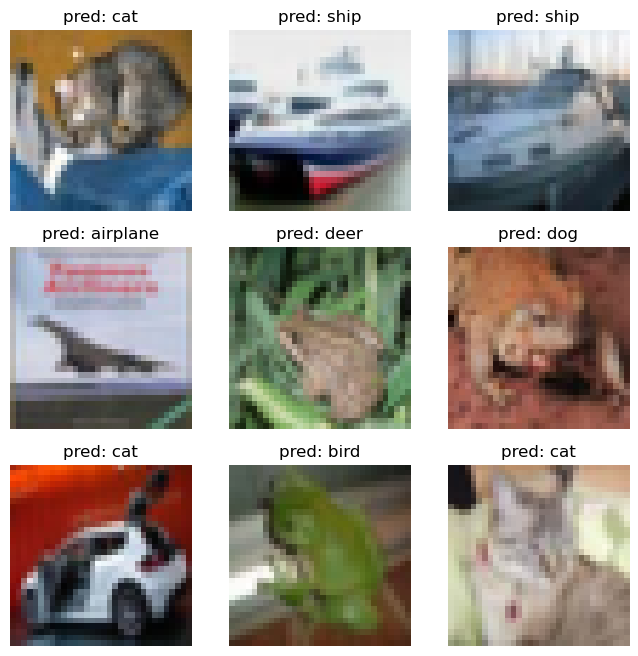

In [11]:
import numpy as np
sample = x_test[:9]
preds = model.predict(sample)
pred_classes = np.argmax(preds, axis=1)

plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(sample[i])
    plt.title(f"pred: {class_names[pred_classes[i]]}")
    plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step


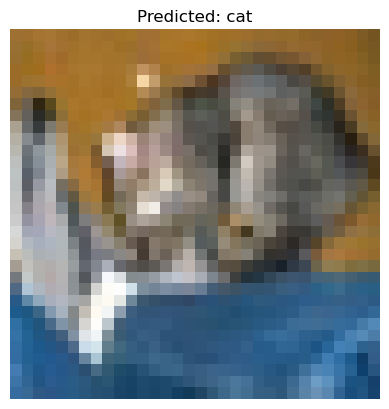

In [12]:
from model_utils import load_trained_model, predict_image, CLASS_NAMES
import matplotlib.pyplot as plt

# Step 1: Load the saved model
model = load_trained_model("cifar10_cnn_model.h5")

# Step 2: Select an image from test data
img = x_test[0]  # First image

# Step 3: Predict its label
pred_index = predict_image(model, img)
predicted_label = CLASS_NAMES[pred_index]

# Step 4: Show result
plt.imshow(img)
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()